In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('/content/qoute_dataset.csv')

In [3]:
df.head()

,quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


In [4]:
sentences = df['quote']

sentences.head()

,quote
0,“The world as we have created it is a process ...
1,"“It is our choices, Harry, that show what we t..."
2,“There are only two ways to live your life. On...
3,"“The person, be it gentleman or lady, who has ..."
4,"“Imperfection is beauty, madness is genius and..."


In [5]:
punctuation = string.punctuation

# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
sentences = sentences.apply(remove_punctuation)

sentences.head()

,quote
0,“The world as we have created it is a process ...
1,“It is our choices Harry that show what we tru...
2,“There are only two ways to live your life One...
3,“The person be it gentleman or lady who has no...
4,“Imperfection is beauty madness is genius and ...


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
tokenizer = Tokenizer()

In [8]:
tokenizer.fit_on_texts(sentences)

In [9]:
len(tokenizer.word_index)

8978

In [10]:
input_sequences = []
for sentence in sentences:
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [11]:
input_sequences

[[713, 62],
 [713, 62, 29],
 [713, 62, 29, 19],
 [713, 62, 29, 19, 16],
 [713, 62, 29, 19, 16, 946],
 [713, 62, 29, 19, 16, 946, 10],
 [713, 62, 29, 19, 16, 946, 10, 7],
 [713, 62, 29, 19, 16, 946, 10, 7, 5],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70, 293],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70, 293, 10],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70, 293, 10, 145],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70, 293, 10, 145, 12],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70, 293, 10, 145, 12, 809],
 [713, 62, 29, 19, 16, 946, 10, 7, 5, 1156, 8, 70, 293, 10, 145, 12, 809, 104],
 [713,
  62,
  29,
  19,
  16,
  946,
  10,
  7,
  5,
  1156,
  8,
  70,
  293,
  10,
  145,
  12,
  809,
  104,
  752],
 [713,
  62,
  29,
  19,
  16,
  946,
  10,
  7,
  5,
  1156,
  8,
  70,
  293,
  10,
  145,
  12,
  809,
  104,
  7

In [12]:
max_len = max([len(x) for x in input_sequences])

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [14]:
padded_input_sequences

array([[   0,    0,    0, ...,    0,  713,   62],
       [   0,    0,    0, ...,  713,   62,   29],
       [   0,    0,    0, ...,   62,   29,   19],
       ...,
       [   0,    0,    0, ...,   19, 1125,    3],
       [   0,    0,    0, ..., 1125,    3,  169],
       [   0,    0,    0, ...,    3,  169,  101]], dtype=int32)

In [15]:
X = padded_input_sequences[:,:-1]

In [16]:
y = padded_input_sequences[:,-1]

In [17]:
X.shape

(85271, 745)

In [18]:
y.shape

(85271,)

In [19]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=len(tokenizer.word_index) + 1)

In [20]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_len - 1))
model.add(LSTM(150))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
tokenizer.word_index

{'the': 1,
 'you': 2,
 'to': 3,
 'and': 4,
 'a': 5,
 'i': 6,
 'is': 7,
 'of': 8,
 'that': 9,
 'it': 10,
 'in': 11,
 'be': 12,
 'not': 13,
 'are': 14,
 'your': 15,
 'have': 16,
 'for': 17,
 'but': 18,
 'we': 19,
 'if': 20,
 'what': 21,
 'with': 22,
 'all': 23,
 'love': 24,
 'can': 25,
 'my': 26,
 'when': 27,
 'will': 28,
 'as': 29,
 'who': 30,
 'do': 31,
 'or': 32,
 'me': 33,
 'he': 34,
 'they': 35,
 'life': 36,
 'one': 37,
 'was': 38,
 'like': 39,
 'there': 40,
 'people': 41,
 'on': 42,
 'its': 43,
 'at': 44,
 'so': 45,
 'never': 46,
 'no': 47,
 'them': 48,
 'dont': 49,
 'know': 50,
 'just': 51,
 'more': 52,
 'only': 53,
 'than': 54,
 'because': 55,
 'this': 56,
 'want': 57,
 'up': 58,
 'how': 59,
 'his': 60,
 'things': 61,
 'world': 62,
 'by': 63,
 'think': 64,
 'make': 65,
 'about': 66,
 'time': 67,
 'from': 68,
 'always': 69,
 'our': 70,
 'an': 71,
 'out': 72,
 'us': 73,
 'good': 74,
 'said': 75,
 'she': 76,
 'her': 77,
 'way': 78,
 'go': 79,
 'am': 80,
 'live': 81,
 'has': 82,
 'so

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 745, 100)       │       897,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8979)           │     1,355,829 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,212,989 (27.52 MB)

 Trainable params: 2,404,329 (9.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,808,660 (18.34 MB)

In [22]:
history = model.fit(X, y, epochs=100,batch_size=120, verbose=1)

Epoch 1/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.0362 - loss: 7.0074
Epoch 2/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.0681 - loss: 6.2272
Epoch 3/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.0988 - loss: 5.8737
Epoch 4/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.1147 - loss: 5.5918
Epoch 5/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.1256 - loss: 5.3701
Epoch 6/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.1396 - loss: 5.1549
Epoch 7/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.1517 - loss: 4.9460
Epoch 8/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.1633 - loss: 4.7791
Epoch 9/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.1742 - loss: 4.6097
Epoch 10/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.1858 - loss: 4.4503
Epoch 11/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.2005 - loss: 4.2831
Epoch 12/100
711/71

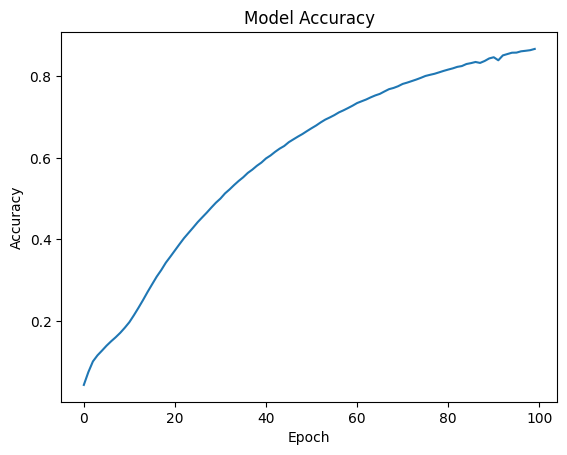

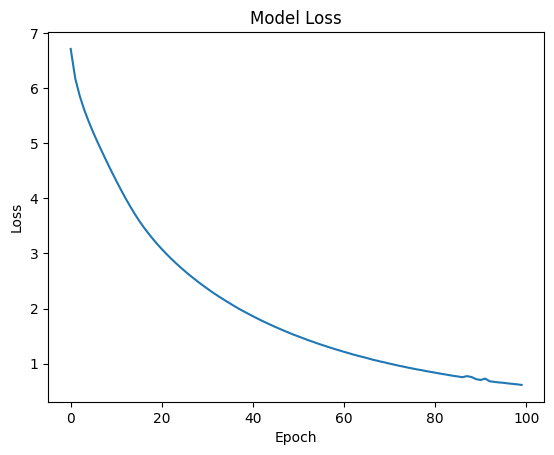

In [23]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [32]:
# Function to predict the next word in a given seed text
def predict_next_word(seed_text, next_words=1):

  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')

    predicted = model.predict(token_list, verbose=0)

    predicted_word_index = np.argmax(predicted, axis=-1)[0]

    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted_word_index:
        output_word = word
        break
    seed_text += " " + output_word
  return seed_text

In [34]:
print(f"Real Quote : {sentences[0]}")

Real Quote : “The world as we have created it is a process of our thinking It cannot be changed without changing our thinking”


In [35]:
print(f"Predicted Quotes after 3 words as input : \n{predict_next_word('the world as',18)}")

Predicted Quotes after 3 words as input : 
It is our choices harry that show what we truly are far more than our abilities” speaks in one day and


In [37]:
print(f"Real Quote : {sentences[4]}")

Real Quote : “Imperfection is beauty madness is genius and its better to be absolutely ridiculous than absolutely boring”


In [36]:
print(f"Predicted Quotes after 3 words as input : \n{predict_next_word('imperfection is beauty',13)}")

Predicted Quotes after 3 words as input : 
imperfection is beauty madness is genius and its better to be absolutely ridiculous than absolutely boring”
